In [2]:
#import all the basic python libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
#for timeseries RNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,SimpleRNN

In [4]:
#Import keras timegenerator and min max scaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler

In [5]:
#Create simple sine wave using numpy
x = np.linspace(0,50,768)
y = np.sin(x)
x

array([ 0.        ,  0.06518905,  0.1303781 ,  0.19556714,  0.26075619,
        0.32594524,  0.39113429,  0.45632334,  0.52151239,  0.58670143,
        0.65189048,  0.71707953,  0.78226858,  0.84745763,  0.91264668,
        0.97783572,  1.04302477,  1.10821382,  1.17340287,  1.23859192,
        1.30378096,  1.36897001,  1.43415906,  1.49934811,  1.56453716,
        1.62972621,  1.69491525,  1.7601043 ,  1.82529335,  1.8904824 ,
        1.95567145,  2.0208605 ,  2.08604954,  2.15123859,  2.21642764,
        2.28161669,  2.34680574,  2.41199478,  2.47718383,  2.54237288,
        2.60756193,  2.67275098,  2.73794003,  2.80312907,  2.86831812,
        2.93350717,  2.99869622,  3.06388527,  3.12907432,  3.19426336,
        3.25945241,  3.32464146,  3.38983051,  3.45501956,  3.5202086 ,
        3.58539765,  3.6505867 ,  3.71577575,  3.7809648 ,  3.84615385,
        3.91134289,  3.97653194,  4.04172099,  4.10691004,  4.17209909,
        4.23728814,  4.30247718,  4.36766623,  4.43285528,  4.49

In [6]:
y

array([ 0.        ,  0.06514289,  0.13000904,  0.1943229 ,  0.25781126,
        0.3202044 ,  0.38123728,  0.44065063,  0.49819205,  0.55361709,
        0.60669031,  0.65718624,  0.70489037,  0.74960006,  0.79112536,
        0.82928988,  0.86393148,  0.89490301,  0.9220729 ,  0.94532572,
        0.9645627 ,  0.97970211,  0.99067964,  0.99744866,  0.99998041,
        0.99826414,  0.99230713,  0.98213469,  0.96779005,  0.94933412,
        0.92684533,  0.90041919,  0.87016798,  0.8362202 ,  0.79872006,
        0.75782688,  0.71371437,  0.66656992,  0.61659382,  0.56399835,
        0.50900696,  0.45185326,  0.39278003,  0.33203823,  0.2698859 ,
        0.20658706,  0.14241062,  0.0776292 ,  0.01251801, -0.05264636,
       -0.11758708, -0.18202829, -0.24569621, -0.30832039, -0.3696348 ,
       -0.42937895, -0.48729906, -0.54314907, -0.59669172, -0.64769957,
       -0.69595591, -0.74125576, -0.78340668, -0.8222296 , -0.8575596 ,
       -0.8892466 , -0.91715598, -0.94116918, -0.9611842 , -0.97

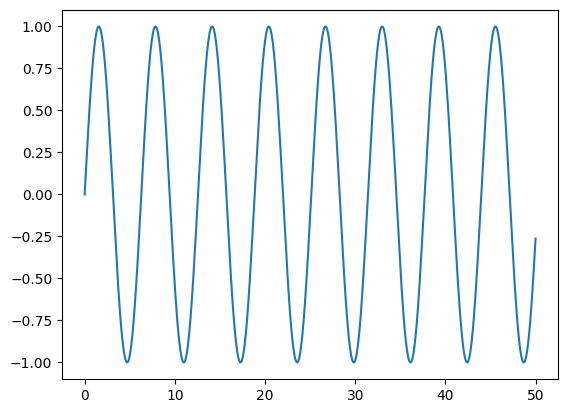

In [7]:

plt.plot(x,y)

In [8]:
#Load the data into pandas dataframe index as x , data as y
df = pd.DataFrame(data=y, index=x, columns=['sine'])
df.head(10)

,sine
0.000000,0.000000
0.065189,0.065143
0.130378,0.130009
0.195567,0.194323
0.260756,0.257811
0.325945,0.320204
0.391134,0.381237
0.456323,0.440651
0.521512,0.498192
0.586701,0.553617


In [9]:
len(df)

768

In [10]:
#testing data precentage 20% 
test_percent = 0.2

In [11]:
#Number of data points reserved for testing the model
len(df)*test_percent

153.60000000000002

In [12]:
#we write this line of code to find the test data length
test_length = np.round(len(df)*test_percent)

In [13]:
test_length

154.0

In [14]:
#the test data starts at this index
test_start_index = int(len(df) - test_length)

In [15]:
test_start_index

614

In [16]:
#create separate training and testing datasets 
#training data includes start to test_start_index
data_train = df.iloc[: test_start_index]
#testing data starts from test_start_index to end of the dataframe
data_train = df.iloc[test_start_index :]

In [17]:
data_train.head(5)

,sine
40.026076,0.727471
40.091265,0.681229
40.156454,0.632093
40.221643,0.580271
40.286832,0.525985


In [18]:
data_train = df.iloc[: test_start_index]
data_train = df.iloc[test_start_index :]
data_test = df.iloc[test_start_index :] 

In [19]:
data_train.head(5)

,sine
40.026076,0.727471
40.091265,0.681229
40.156454,0.632093
40.221643,0.580271
40.286832,0.525985


In [20]:
data_test.head(5)

,sine
40.026076,0.727471
40.091265,0.681229
40.156454,0.632093
40.221643,0.580271
40.286832,0.525985


Normalisation of data

In [21]:
#create a minmax scaler to normalize the data 
scaler = MinMaxScaler()

In [22]:
#train the scaler to perform the normalization
scaler.fit(data_train)

MinMaxScaler()

In [23]:
#normalize both the training and testing dataset
normalized_train = scaler.transform(data_train)
normalized_test = scaler.transform(data_test)

In [24]:
## Create a time series generator instance

In [25]:
#set the length of input sequence : the number of steps are used to predict the future
length = 50

In [26]:
#batch_Size tells about the number of time series sample in each batch 
batch_size = 1

In [27]:
# create a time series generator for training 
train_tsGenerator50 = TimeseriesGenerator(normalized_train, normalized_train, length=length, batch_size=batch_size)

In [28]:
len(normalized_train)

154

In [29]:
#run this command to check how does the batch look like
X,y = train_tsGenerator50[0]

In [30]:
#to get flatten array
X.flatten()

array([8.63778058e-01, 8.40655791e-01, 8.16086485e-01, 7.90174513e-01,
       7.63029953e-01, 7.34768116e-01, 7.05509063e-01, 6.75377089e-01,
       6.44500198e-01, 6.13009558e-01, 5.81038945e-01, 5.48724174e-01,
       5.16202520e-01, 4.83612140e-01, 4.51091481e-01, 4.18778695e-01,
       3.86811049e-01, 3.55324345e-01, 3.24452342e-01, 2.94326189e-01,
       2.65073863e-01, 2.36819632e-01, 2.09683524e-01, 1.83780814e-01,
       1.59221542e-01, 1.36110036e-01, 1.14544477e-01, 9.46164787e-02,
       7.64106965e-02, 6.00044707e-02, 4.54674966e-02, 3.28615291e-02,
       2.22401194e-02, 1.36483886e-02, 7.12283523e-03, 2.69118051e-03,
       3.72250621e-04, 1.75896609e-04, 2.10295261e-03, 6.14523229e-03,
       1.22855636e-02, 2.04978618e-02, 3.07472401e-02, 4.29901580e-02,
       5.71746064e-02, 7.32403282e-02, 9.11190744e-02, 1.10734894e-01,
       1.32004458e-01, 1.54837409e-01])

In [31]:
# predicts the next value
y

array([[0.17913675]])

Build, Train and Test the model

In [32]:
# we write this command to check howmany features have been used in the traning model
n_features=1
#deine model
model = Sequential()
# add 2 layers simple RNN and dense layer 
model.add(SimpleRNN(64,input_shape=(length,n_features)))
model.add(Dense(1))

Compile Model

In [33]:
#compile the model and use optimizer Adam and Loss MSE , here we use MSE because the data is continuos : aregression problem
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 64)                4224      
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 4289 (16.75 KB)
Trainable params: 4289 (16.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
#fit the model by using the below command 
model.fit_generator(train_tsGenerator50,epochs=5)

C:\Users\KONGA\AppData\Local\Temp\ipykernel_16444\329645316.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_tsGenerator50,epochs=5)


Epoch 1/5
104/104 [==============================] - 1s 5ms/step - loss: 0.0226
Epoch 2/5
104/104 [==============================] - 0s 4ms/step - loss: 0.0017
Epoch 3/5
104/104 [==============================] - 0s 4ms/step - loss: 7.9237e-04
Epoch 4/5
104/104 [==============================] - 1s 6ms/step - loss: 2.0944e-04
Epoch 5/5
104/104 [==============================] - 2s 21ms/step - loss: 3.5028e-04


Visualize model after training

<Axes: >

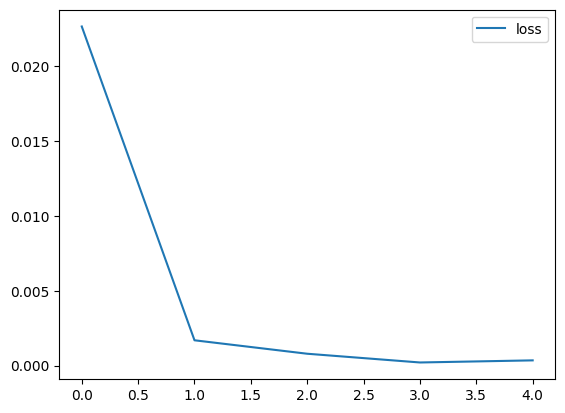

In [35]:
#load the loss data into a dataframe and visulaize the dataframe
df_model_loss=pd.DataFrame(model.history.history)
df_model_loss.plot()

Evaluate model on test data

In [36]:
#number of time steps of the input time series
length

50

In [37]:
#1st series  batch 
first_eval_batch = normalized_train[-length :]
first_eval_batch

array([[0.65643867],
       [0.62516806],
       [0.59336582],
       [0.56116706],
       [0.52870855],
       [0.49612819],
       [0.46356439],
       [0.43115547],
       [0.39903911],
       [0.36735175],
       [0.336228  ],
       [0.30580007],
       [0.27619723],
       [0.24754523],
       [0.21996578],
       [0.19357606],
       [0.16848816],
       [0.14480866],
       [0.12263816],
       [0.10207084],
       [0.08319406],
       [0.06608803],
       [0.0508254 ],
       [0.03747102],
       [0.02608161],
       [0.01670556],
       [0.00938271],
       [0.00414415],
       [0.00101215],
       [0.        ],
       [0.00111201],
       [0.00434345],
       [0.0096806 ],
       [0.01710078],
       [0.02657248],
       [0.03805545],
       [0.05150091],
       [0.06685174],
       [0.08404275],
       [0.10300088],
       [0.12364562],
       [0.14588925],
       [0.16963728],
       [0.19478884],
       [0.22123707],
       [0.24886962],
       [0.2775691 ],
       [0.307

In [38]:
#reshape the batch it is necessary to be in 3d
first_eval_batch = first_eval_batch.reshape((1,length,n_features))
first_eval_batch

array([[[0.65643867],
        [0.62516806],
        [0.59336582],
        [0.56116706],
        [0.52870855],
        [0.49612819],
        [0.46356439],
        [0.43115547],
        [0.39903911],
        [0.36735175],
        [0.336228  ],
        [0.30580007],
        [0.27619723],
        [0.24754523],
        [0.21996578],
        [0.19357606],
        [0.16848816],
        [0.14480866],
        [0.12263816],
        [0.10207084],
        [0.08319406],
        [0.06608803],
        [0.0508254 ],
        [0.03747102],
        [0.02608161],
        [0.01670556],
        [0.00938271],
        [0.00414415],
        [0.00101215],
        [0.        ],
        [0.00111201],
        [0.00434345],
        [0.0096806 ],
        [0.01710078],
        [0.02657248],
        [0.03805545],
        [0.05150091],
        [0.06685174],
        [0.08404275],
        [0.10300088],
        [0.12364562],
        [0.14588925],
        [0.16963728],
        [0.19478884],
        [0.22123707],
        [0

In [39]:
#now check the shape
first_eval_batch.shape

(1, 50, 1)

Evaluate the model

In [40]:
# the full code is for evaluation, at first create a empty set to store all predicitons 
test_predictions = []
#this is last 50 datapoints of the train set 
first_eval_batch = normalized_train[-length:]
#reshape the batch to 3d array
current_batch = first_eval_batch.reshape((1,length, n_features))
#run for loopto make a prediction and get the value and store the prediction 
for i in range(len(data_test)):
    current_pred = model.predict(current_batch)[0]
    test_predictions.append(current_pred)
    # generate a new batch to prepare for the next iteration of the testing and drop the first data of the current inputsequence
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 21ms/step


In [41]:
#convert the scaled results back to the real values 
true_predictions = scaler.inverse_transform(test_predictions)
true_predictions

array([[-0.21912221],
       [-0.15433037],
       [-0.09743569],
       [-0.04083342],
       [ 0.012464  ],
       [ 0.0752515 ],
       [ 0.12624979],
       [ 0.17537789],
       [ 0.22897457],
       [ 0.28010398],
       [ 0.32407142],
       [ 0.37369326],
       [ 0.42589812],
       [ 0.46918288],
       [ 0.5136909 ],
       [ 0.55732266],
       [ 0.60048476],
       [ 0.63403907],
       [ 0.67054068],
       [ 0.70622622],
       [ 0.73644439],
       [ 0.76167032],
       [ 0.78688993],
       [ 0.80973811],
       [ 0.82349394],
       [ 0.83765398],
       [ 0.84834116],
       [ 0.85681854],
       [ 0.85698268],
       [ 0.86164425],
       [ 0.86015301],
       [ 0.85539597],
       [ 0.84651127],
       [ 0.83989524],
       [ 0.82751061],
       [ 0.81240576],
       [ 0.79891087],
       [ 0.78180233],
       [ 0.76156339],
       [ 0.73943139],
       [ 0.71866581],
       [ 0.69235036],
       [ 0.66565894],
       [ 0.6383969 ],
       [ 0.60988001],
       [ 0

In [42]:
data_test

,sine
40.026076,0.727471
40.091265,0.681229
40.156454,0.632093
40.221643,0.580271
40.286832,0.525985
...,...
49.739244,-0.502284
49.804433,-0.444888
49.869622,-0.385602
49.934811,-0.324678


In [43]:
#copy the true values of prediction into the dataframe of original data set
data_test['predictions'] = true_predictions

C:\Users\KONGA\AppData\Local\Temp\ipykernel_16444\2947684913.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test['predictions'] = true_predictions


In [44]:
#updated data test 
data_test

,sine,predictions
40.026076,0.727471,-0.219122
40.091265,0.681229,-0.154330
40.156454,0.632093,-0.097436
40.221643,0.580271,-0.040833
40.286832,0.525985,0.012464
...,...,...
49.739244,-0.502284,1.079101
49.804433,-0.444888,1.131153
49.869622,-0.385602,1.179530
49.934811,-0.324678,1.215622


<Axes: >

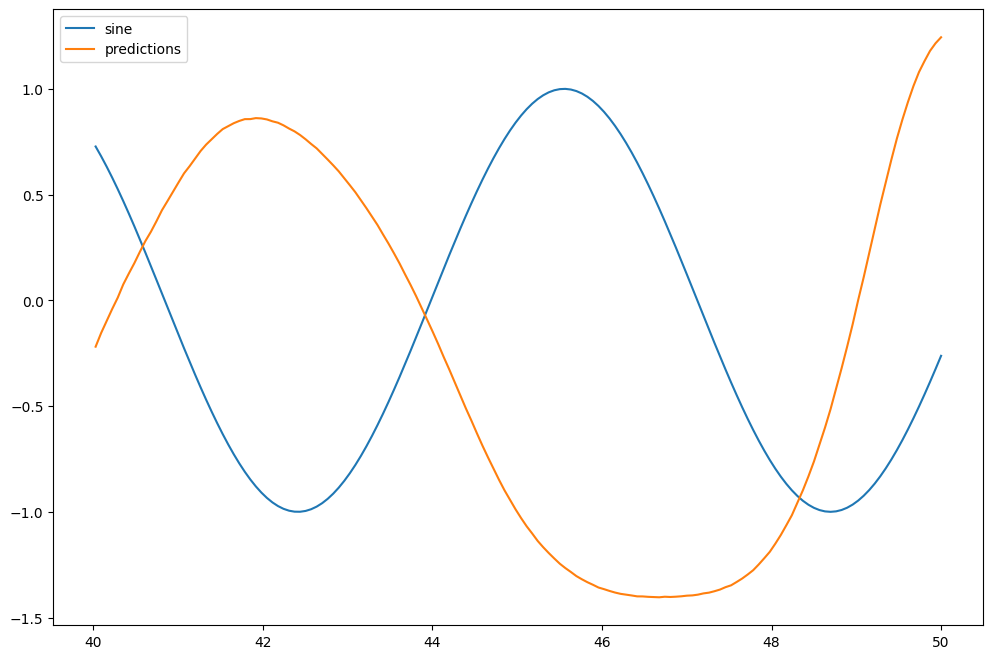

In [45]:
#visualize the data of updated test data 
#compare the predicted sine wave against the original sine wave
data_test.plot(figsize=(12,8))